In [1]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
from IPython.core.display import HTML
plt.ion()

In [84]:
print '\nEnter 1 to train and test on a subsample of the training data.'
print 'Enter 0 to train on full training sample, and test on the Kaggle test data.\n'
test_on_train = raw_input('ENTER 1 or 0: ')


Enter 1 to train and test on a subsample of the training data.
Enter 0 to train on full training sample, and test on the Kaggle test data.

ENTER 1 or 0: 0


In [85]:
import notebook.nbextensions
notebook.nbextensions.install_nbextension('https://rawgithub.com/minrk/ipython_extensions/master/nbextensions/gist.js', user=True)


u'/home/ys/.local/share/jupyter/nbextensions/gist.js'

In [86]:
%%javascript
Jupyter.utils.load_extensions('gist')

<IPython.core.display.Javascript object>

In [87]:
#read in training data
csv_file_object = csv.reader(open('train.csv', 'r')) 
header1 = csv_file_object.next()
data1 = []
for row in csv_file_object:
    data1.append(row)
data1 = np.array(data1)

In [88]:
print(type(csv_file_object))
print(header1)
print(data1)

<type '_csv.reader'>
['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']
[['2011-01-01 00:00:00' '1' '0' ..., '3' '13' '16']
 ['2011-01-01 01:00:00' '1' '0' ..., '8' '32' '40']
 ['2011-01-01 02:00:00' '1' '0' ..., '5' '27' '32']
 ..., 
 ['2012-12-19 21:00:00' '4' '0' ..., '4' '164' '168']
 ['2012-12-19 22:00:00' '4' '0' ..., '12' '117' '129']
 ['2012-12-19 23:00:00' '4' '0' ..., '4' '84' '88']]


In [89]:
_i79

u'print(type(csv_file_object))\nprint(header1)\nprint(data1)'

In [90]:
##optionally make the training set small even for applying to REAL 
## test data for submission (random forests keep crashing...)
#temp = data1
#train_size = int(temp.shape[0]/5.)
#train_sample_indices = np.random.random_integers(0,(temp.shape[0]-1),train_size)
#data1 = temp[train_sample_indices,:]

In [91]:
# #Hide all cell
# from IPython.display import HTML

# HTML('''<script>
# code_show=true; 
# function code_toggle() {
#  if (code_show){
#  $('div.input').hide();
#  } else {
#  $('div.input').show();
#  }
#  code_show = !code_show
# } 
# $( document ).ready(code_toggle);
# </script>
# <form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [100]:
pd_csv_file_object = pd.read_csv('train.csv')
pd_csv_file_object.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [101]:
if test_on_train == '1':
    print '\nPreparing to train and test on subsets of Training Data...\n'

    temp = data1
    train_size = int(temp.shape[0]/20.)
    train_sample_indices = np.random.random_integers(0,(temp.shape[0]-1),train_size)
    data1 = temp[train_sample_indices,:]

    test_sample_indices = [i for i in range(temp.shape[0]) if i not in train_sample_indices]
    data2 = temp[test_sample_indices,:]

    header2 = header1
    true_count = temp[test_sample_indices, header1.index('count')].astype(int)
else:
    print '\nPreparing to apply model to Kaggle Test Data...\n'

    #read in testing data
    test_file_object = csv.reader(open('test.csv', 'r'))
    header2 = test_file_object.next()
    data2 = []
    for row in test_file_object:
        data2.append(row)
    data2 = np.array(data2)



Preparing to apply model to Kaggle Test Data...



In [102]:
print data2, data2.size, data2.shape

[['2011-01-20 00:00:00' '1' '0' ..., '11.365' '56' '26.0027']
 ['2011-01-20 01:00:00' '1' '0' ..., '13.635' '56' '0']
 ['2011-01-20 02:00:00' '1' '0' ..., '13.635' '56' '0']
 ..., 
 ['2012-12-31 21:00:00' '1' '0' ..., '12.88' '60' '11.0014']
 ['2012-12-31 22:00:00' '1' '0' ..., '13.635' '56' '8.9981']
 ['2012-12-31 23:00:00' '1' '0' ..., '13.635' '65' '8.9981']] 58437 (6493, 9)


In [103]:
#========================================
### MAIN FUNCTION BLOCK ###

def bikerides():

    #select features to train on & organize data
    train_data, train_count, test_data, test_datetime, important = feature_selection()

    #select & run machine learning algorithm
    learning_selection(train_data, train_count, test_data, test_datetime)

    #plot features
    print '------------------------------------\n'

    wanttoplot = raw_input('Would you like to plot features? [enter y/n]: ')

    while wanttoplot == 'y':

        plotting_selection(important, train_data, train_count)

        print '\n------------------------------------'
        wanttoplot = raw_input('\nWould you like to make another plot? [enter y/n]: ')
        #plt.close()
        plt.figure() #start new figure, leave others up


    print '\nFinished\n'

    return

### end bikerides MAIN block

#========================================

In [104]:
# select which features to use and set up arrays...

def feature_selection():

    print '------------------------------------\n'

    choose_features = raw_input('CHOOSE IMPORTANT FEATURES TO TRAIN ON.\nYou can select any of the following features:\n\n   time \n   season \n   holiday \n   workingday \n   weather \n   temp \n   atemp \n   humidity \n   windspeed \n\nList names separated by a space, for example: weather atemp \n  (you can also enter "ALL") \n\nENTER FEATURES: ')

    if choose_features == 'ALL':
        important = ['time', 'season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed']
    else:
        important = choose_features.split()

    print '\nOrganizing data structures.\n'

    train_data = np.zeros([data1.shape[0],len(important)])
    test_data = np.zeros([data2.shape[0],len(important)])

    for j, item in enumerate(important):

        print '...processing: ', j, item

        if item == 'time':
            time1 = [datetime[11:13] for datetime in data1[:,0]] #pick out hours
            train_data[:,j] = np.array(time1).astype(np.float) #convert to float
            time2 = [datetime[11:13] for datetime in data2[:,0]]
            test_data[:,j] = np.array(time2).astype(np.float)

        else:
            #get corresponding indices for each data set
            itrain = header1.index(item)
            itest = header2.index(item)

            #convert all entries to float 
            train_data[:,j] = data1[:,itrain].astype(np.float)
            test_data[:,j] = data2[:,itest].astype(np.float)


    train_count = data1[:,-1].astype(np.float)
    test_datetime = data2[:,0]

    return train_data, train_count, test_data, test_datetime, important


In [105]:
#========================================

# choose a machine learning method

def learning_selection(datatrain, alivetrain, datatest, datetime):

    print '\n------------------------------------'

    print '\nChoose a Machine Learning technique from the following list: \n'
    print '   1. ORDINARY LEAST SQUARES \n\t fits a linear model by minimizing the residual sum of squares'
    print '   2. STOCASTIC GRADIENT DESCENT (SGD) \n\t linear classifier applied to a normalized/standardized \n\t version of the data, using the hinge-loss option for penalties; \n\t searches can be more efficient using gradient information'
    print '   3. BAYESIAN RIDGE REGRESSION \n\t fits a linear model by maximizing the marginal log(Likelihood);\n\t can be more robust to poorly-defined problems' 
    print '   4. RANDOM FOREST \n\t each tree gets a bootstrapped sample of training data, and \n\t branches are chosen that yield the best outcome for a random \n\t subsample of features; final result is the model average of \n\t all 100 trees'
    print '   5. EXTREMELY RANDOMIZED FOREST \n\t similar to above, but sets a random threshold for whether a \n\t branch outcome is considered better or not; can further \n\t reduce variance, but may be more biased'
    print '   6. SUPPORT VECTOR MACHINE (SVM) \n\t multi-class classification using subsets of training data \n\t (support vectors); can be effective in many dimensions, \n\t usable with more features than training samples' 
    print '   7. NAIVE BAYES \n\t assumes features are independent and gaussian; fast to run \n\t and can be trained on very small samples'
    print '   8. BERNOULLI NAIVE BAYES \n\t assumes binary distributions of data, or may manipulate data \n\t into this form' 
    print '   9. ADABOOST \n\t ensemble method (like forests) that uses weights on the \n\t training samples to boost importance of incorrect predictions, \n\t so that improvements can be made before outputting the average \n\t of all 100 weak learners'
    print '  10. GRADIENT BOOSTED REGRESSION TREES (GBRT) \n\t another ensemble method with 100 weak learners; robust to \n\t outliers and handling of mixed data types'

    choose_method = int(raw_input('\nENTER THE # OF THE TECHNIQUE YOU WANT TO APPLY: '))


    #-------------
    # ORDINARY LEAST SQUARES
    if choose_method == 1:
        print '\nRunning OLS...\n'
        from sklearn import linear_model
        ols = linear_model.LinearRegression()
        ols.fit(datatrain,alivetrain)
        Output = ols.predict(datatest)

    #-------------
    # STOCASTIC GRADIENT DESCENT (SGD)
    elif choose_method == 2:
        print '\nRunning SGD Classifier...\n'
        from sklearn.linear_model import SGDClassifier

        #normalize feature scaling (SGD is sensitive to this)
        # note: this helps significantly (~10% improvement in score)
        from sklearn.preprocessing import StandardScaler
        scaler = StandardScaler()
        scaler.fit(datatrain)
        datatrain = scaler.transform(datatrain)

        # apply same transformation to test data
        datatest = scaler.transform(datatest)  

        sgdc = SGDClassifier(loss="hinge", penalty="l2")
        sgdc.fit(datatrain,alivetrain)
        Output = sgdc.predict(datatest)

    #-------------
    # BAYESIAN RIDGE REGRESSION
    elif choose_method == 3:
        print '\nRunning Bayesian Ridge Regression...\n'
        from sklearn import linear_model
        brr = linear_model.BayesianRidge()
        brr.fit(datatrain,alivetrain)
        Output = brr.predict(datatest)

    #-------------
    # RANDOM FOREST
    elif choose_method == 4:
        print '\nRunning Random Forest Classifier...\n'
        from sklearn.ensemble import RandomForestClassifier
        Forest = RandomForestClassifier(n_estimators = 100) #1000 trees
        Forest = Forest.fit(datatrain,alivetrain)
        Output = Forest.predict(datatest)

    #-------------
    # EXTREMELY RANDOMIZED FOREST
    elif choose_method == 5:
        print '\nRunning Extremely Randomized Forest...\n'
        from sklearn.ensemble import ExtraTreesClassifier
        extratrees = ExtraTreesClassifier(n_estimators = 100) #1000 trees
        extratrees = extratrees.fit(datatrain,alivetrain)
        Output = extratrees.predict(datatest)

    #-------------
    # SUPPORT VECTOR MACHINES
    elif choose_method == 6:
        print '\nRunning SVM Classifier...\n'
        from sklearn import svm
        clf = svm.SVC()
        clf.fit(datatrain,alivetrain)
        Output = clf.predict(datatest)

    #-------------
    # NAIVE BAYES
    elif choose_method == 7:
        print '\nRunning Gaussian Naive Bayes...\n'
        from sklearn.naive_bayes import GaussianNB
        gnb = GaussianNB()
        gnb.fit(datatrain,alivetrain)
        Output = gnb.predict(datatest)

    #-------------
    # BERNOULLI NAIVE BAYES
    elif choose_method == 8:
        print '\nRunning Bernoulli Naive Bayes...\n'
        from sklearn.naive_bayes import BernoulliNB
        bern = BernoulliNB()
        bern.fit(datatrain,alivetrain)
        Output = bern.predict(datatest)

    #-------------
    # ADABOOST
    elif choose_method == 9:
        print '\nRunning AdaBoost Classifier...\n'
        from sklearn.ensemble import AdaBoostClassifier
        ada = AdaBoostClassifier(n_estimators=100)
        ada.fit(datatrain,alivetrain)
        Output = ada.predict(datatest)

    #-------------
    # GRADIENT TREE BOOSTING
    elif choose_method == 10:
        print '\nRunning GBRT Classifier...\n'
        from sklearn.ensemble import GradientBoostingClassifier
        grad = GradientBoostingClassifier(n_estimators=100)
        grad.fit(datatrain,alivetrain)
        Output = grad.predict(datatest)


    #----------------------------------------
    # Either analyze response to the subset of Training Data OR
    # output result on Kaggle Test Data to a file for submission...

    count = Output.astype(np.int)

    if test_on_train == '1':
        print '------------------------------------\n'
        print 'Comparing to known counts.\n'

        #OUTPUT SOME STATISTICAL COMPARISONS HERE!

        #print true_count.shape,count.shape, len(true_count), len(count)

        #print 'LESS THAN ZERO?? ', len(np.where(count < 0.))
        count[np.where(count < 0.)] = 0.
        n = len(true_count)
        summation_arg = (np.log(count+1.) - np.log(true_count+1.))**2.
        rmsle = np.sqrt(np.sum(summation_arg)/n)

        print 'RMSLE', rmsle, '\n'

    else:
        print 'Saving Predictions in file: output.csv\n'

        f = open('output.csv', 'w')
        open_file_object = csv.writer(f)

        open_file_object.writerow(['datetime','count'])

        for i in range(len(datetime)):
            open_file_object.writerow([datetime[i],count[i]])

        f.close()

    return

### end of learning_selection()

In [106]:
# Plotting option function

def plotting_selection(important, train_data, train_count):

    print '\nCHOOSE FEATURES TO PLOT.\nYou can select any one of the features that you used for analysis. \nCOUNT will be plotted as a function of your variable.\n'

    for j,item in enumerate(important):
        print str(j+1)+'. '+item

    plotfeatures = raw_input('\nENTER THE # of A FEATURE: ')

    index = int(plotfeatures) - 1

    x_var = train_data[:,index] #x-axis variable
    y_var = train_count         #y-axis variable

    jitter = np.random.randn(len(y_var))/2.
    if important[index] in ['season','holiday','workingday','weather']:
        jitter = jitter/5. #smaller jitter

    plt.scatter(x_var+jitter,y_var,color='darkcyan', marker='+')

    if important[index] in ['holiday','workingday']:
        ix = np.digitize(x_var,bins=[-0.5,0.5,1.5])
    elif important[index] in ['season','weather']:
        ix = np.digitize(x_var,bins=[0.5,1.5,2.5,3.5,4.5])
    else:
        b = [i for i in range(int(np.min(x_var)-1),int(np.max(x_var)+1),3)]
        ix = np.digitize(x_var,bins=b)

    for i in list(set(ix)):
        here = np.where(ix == i)
        x_mean = np.mean(x_var[here])
        y_mean = np.mean(y_var[here])
        plt.scatter(x_mean,y_mean,color='black', marker='o', s=100)

    plt.xlabel(important[index])
    plt.ylabel('count')
    #plt.title('blue = lived, orange = died')

    return

### end of plotting_selection


------------------------------------

CHOOSE IMPORTANT FEATURES TO TRAIN ON.
You can select any of the following features:

   time 
   season 
   holiday 
   workingday 
   weather 
   temp 
   atemp 
   humidity 
   windspeed 

List names separated by a space, for example: weather atemp 
  (you can also enter "ALL") 

ENTER FEATURES: ALL

Organizing data structures.

...processing:  0 time
...processing:  1 season
...processing:  2 holiday
...processing:  3 workingday
...processing:  4 weather
...processing:  5 temp
...processing:  6 atemp
...processing:  7 humidity
...processing:  8 windspeed

------------------------------------

Choose a Machine Learning technique from the following list: 

   1. ORDINARY LEAST SQUARES 
	 fits a linear model by minimizing the residual sum of squares
   2. STOCASTIC GRADIENT DESCENT (SGD) 
	 linear classifier applied to a normalized/standardized 
	 version of the data, using the hinge-loss option for penalties; 
	 searches can be more efficient usi

ValueError: invalid literal for int() with base 10: ''

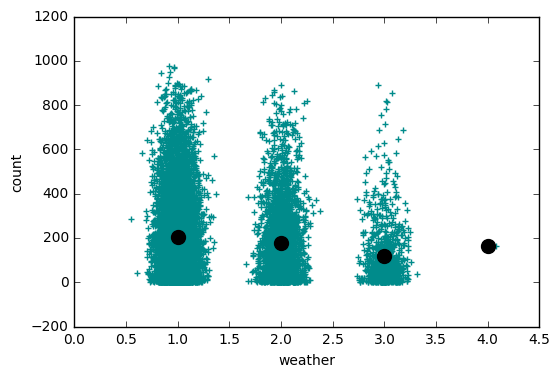

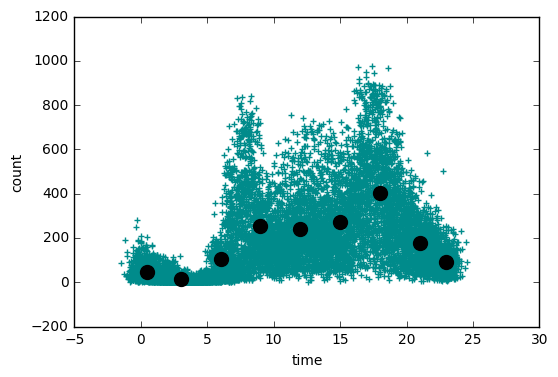

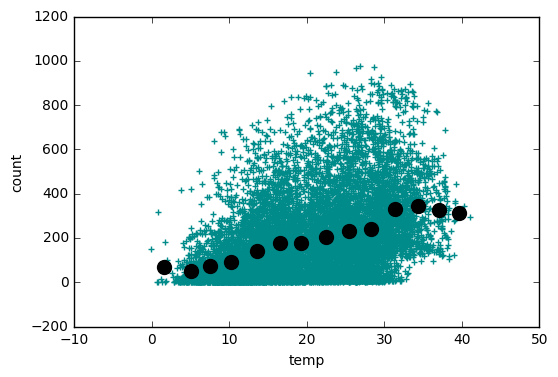

In [109]:
bikerides()